1. Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени,

б) скорость полета самолета при перелете из аэропорта А в аэропорт В,

в) количество отказов компьютера,

г) число обращений в поликлинику по району,

д) координаты автобуса при движении по маршруту,

е) координаты фигуры нарушителя в файле видеофиксации охранной системы.



Ответ:

       а, б,

       в (если отказы указаны по определенным отрезкам времени(например, неделям)),
       
       г, д,
       
       е(если координаты указаны в динамике с временной меткой)

2. вариант 1) Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

"2. вариант2) COVID19 EDA для любой страны кроме Китая с длиной ряда больше 50 дней ( можно обновить данные по ссылке).


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


## Данные для анализа

https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset#covid_19_data.csv


Прочитаем ежеденевно обновляемые данные из ссылки и загрузим себе.

In [2]:
COVID_ = pd.read_csv('covid_19_data.csv')
COVID_.head(20)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [3]:
COVID_.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13845,13846,04/10/2020,Wyoming,US,2020-04-10 23:01:43,239.0,0.0,0.0
13846,13847,04/10/2020,Xinjiang,Mainland China,2020-04-10 23:01:43,76.0,3.0,73.0
13847,13848,04/10/2020,Yukon,Canada,2020-04-10 23:01:43,8.0,0.0,0.0
13848,13849,04/10/2020,Yunnan,Mainland China,2020-04-10 23:01:43,184.0,2.0,173.0
13849,13850,04/10/2020,Zhejiang,Mainland China,2020-04-10 23:01:43,1267.0,1.0,1235.0


Выносим дату отдельным столбцом и делаем копии

In [4]:
COVID = COVID_.copy()
COVID_['Data']= pd.to_datetime(COVID_['ObservationDate']).dt.date
COVID['Data']= pd.to_datetime(COVID['ObservationDate']).dt.date


Группируем по странам (без провинций) и дате измерения

In [5]:
COVID = COVID.groupby(['Data','Country/Region'])['Confirmed','Deaths','Recovered'].sum()

In [6]:
COVID.head(30)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              3.0     0.0        0.0
           US                    1.0     0.0        0.0
           Vietnam               2.0     0.0        0.0
2020-01-24 France                2.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      916.0    26.0       36.0
           Singapore             3.0     0.0        0.0

Нарисуем для России

In [57]:
COUNTRY = 'South Korea'

In [58]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']][-50:]

,,Confirmed,Deaths,Recovered
Data,Country/Region,,,
2020-02-21,South Korea,204.0,2.0,16.0
2020-02-22,South Korea,433.0,2.0,16.0
2020-02-23,South Korea,602.0,6.0,18.0
2020-02-24,South Korea,833.0,8.0,18.0
2020-02-25,South Korea,977.0,10.0,22.0
2020-02-26,South Korea,1261.0,12.0,22.0
2020-02-27,South Korea,1766.0,13.0,22.0
2020-02-28,South Korea,2337.0,13.0,22.0
2020-02-29,South Korea,3150.0,16.0,27.0


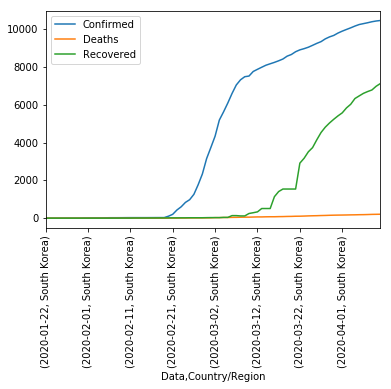

In [59]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Есть какие-то странные места в марте в стаистике выздоровевших

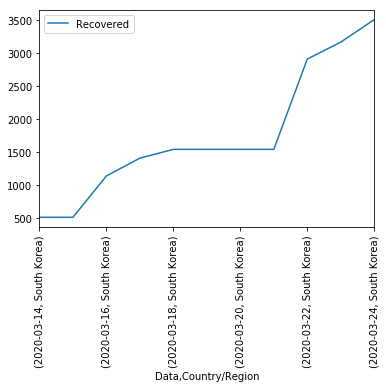

In [75]:
COVID.loc[((COVID.index.get_level_values( 'Country/Region')==COUNTRY) & (COVID.index.get_level_values( 'Data') > pd.to_datetime('2020-03-13'))& (COVID.index.get_level_values( 'Data') < pd.to_datetime('2020-03-25'))), ['Recovered']].plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Посмотрим на них в цифрах

In [76]:
COVID_.loc[( (COVID_[ 'Country/Region']==COUNTRY) & (COVID_['Data'] > pd.to_datetime('2020-03-13'))& (COVID_['Data'] < pd.to_datetime('2020-03-25'))), :].head(50)


,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Data
5386,5387,03/14/2020,NaN,South Korea,2020-03-14T01:33:02,8086.0,72.0,510.0,2020-03-14
5635,5636,03/15/2020,NaN,South Korea,2020-03-15T18:20:18,8162.0,75.0,510.0,2020-03-15
5894,5895,03/16/2020,NaN,South Korea,2020-03-16T14:38:45,8236.0,75.0,1137.0,2020-03-16
6167,6168,03/17/2020,NaN,South Korea,2020-03-17T10:33:03,8320.0,81.0,1407.0,2020-03-17
6444,6445,03/18/2020,NaN,South Korea,2020-03-18T02:53:03,8413.0,84.0,1540.0,2020-03-18
6728,6729,03/19/2020,NaN,South Korea,2020-03-19T02:13:17,8565.0,91.0,1540.0,2020-03-19
7020,7021,03/20/2020,NaN,South Korea,2020-03-20T02:13:46,8652.0,94.0,1540.0,2020-03-20
7320,7321,03/21/2020,NaN,South Korea,2020-03-21T11:13:12,8799.0,102.0,1540.0,2020-03-21
7753,7754,03/22/2020,NaN,South Korea,3/8/20 5:31,8897.0,104.0,2909.0,2020-03-22
8051,8052,03/23/2020,NaN,South Korea,2020-03-23 23:23:20,8961.0,111.0,3166.0,2020-03-23


Пока нет дополнительной информации не скажешь, что происходит. Похоже на смену принципа подсчета выздоровевших или некорректные данные

In [77]:
COVID.head(20)

Confirmed  Deaths  Recovered
Data       Country/Region                              
2020-01-22 Hong Kong             0.0     0.0        0.0
           Japan                 2.0     0.0        0.0
           Macau                 1.0     0.0        0.0
           Mainland China      547.0    17.0       28.0
           South Korea           1.0     0.0        0.0
           Taiwan                1.0     0.0        0.0
           Thailand              2.0     0.0        0.0
           US                    1.0     0.0        0.0
2020-01-23 Australia             0.0     0.0        0.0
           Brazil                0.0     0.0        0.0
           Colombia              0.0     0.0        0.0
           Hong Kong             2.0     0.0        0.0
           Japan                 1.0     0.0        0.0
           Macau                 2.0     0.0        0.0
           Mainland China      639.0    18.0       30.0
           Malaysia              0.0     0.0        0.0
           Mexico                0.0     0.0        0.0
           Philippines           0.0     0.0        0.0
           Singapore             1.0     0.0        0.0
           South Korea           1.0     0.0        0.0

Сделаем первые разности (производную)

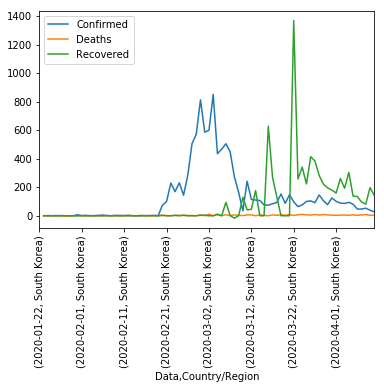

In [78]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']].diff(1).plot()
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)

plt.show()

Опять большой пик - нужен дополнительный анализ

Посмотрим только на выздоровление (так оптимистичней:))

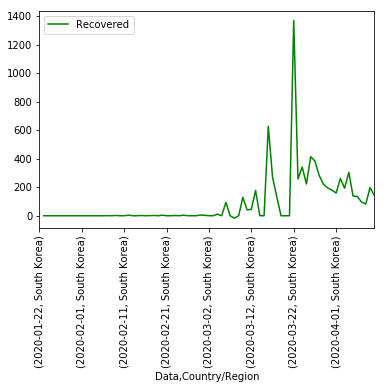

In [79]:
COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Recovered']].diff(1).plot(color='green')
# plt.xticks(label = COVID1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']].diff(1).values, rotation=90)
plt.xticks(label = COVID.index.get_level_values('Data'), rotation=90)
plt.show()

Во второй половине марта - два скачка подряд, затем замеднение


## Построим признаки

1) Первая разность (производная ряда) - разница с(t)-c(t-1) по всем t 

In [80]:
X1 = COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']].diff(1).values
X1[0,:] = 0

2) Сами значения элементов ряда по времени

In [81]:
X2 = COVID.loc[COVID.index.get_level_values( 'Country/Region')==COUNTRY, ['Confirmed','Deaths','Recovered']].values 

In [82]:
X1.shape

(80, 3)

In [83]:
X2.shape

(80, 3)

In [100]:
daysq = X2.shape[0]

3) Добавим признаков по календарю
   

In [84]:
X3 = COVID.iloc[COVID.index.get_level_values( 'Country/Region')==COUNTRY].index.get_level_values( 'Data')

In [85]:
X3

Index([2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26, 2020-01-27,
       2020-01-28, 2020-01-29, 2020-01-30, 2020-01-31, 2020-02-01, 2020-02-02,
       2020-02-03, 2020-02-04, 2020-02-05, 2020-02-06, 2020-02-07, 2020-02-08,
       2020-02-09, 2020-02-10, 2020-02-11, 2020-02-12, 2020-02-13, 2020-02-14,
       2020-02-15, 2020-02-16, 2020-02-17, 2020-02-18, 2020-02-19, 2020-02-20,
       2020-02-21, 2020-02-22, 2020-02-23, 2020-02-24, 2020-02-25, 2020-02-26,
       2020-02-27, 2020-02-28, 2020-02-29, 2020-03-01, 2020-03-02, 2020-03-03,
       2020-03-04, 2020-03-05, 2020-03-06, 2020-03-07, 2020-03-08, 2020-03-09,
       2020-03-10, 2020-03-11, 2020-03-12, 2020-03-13, 2020-03-14, 2020-03-15,
       2020-03-16, 2020-03-17, 2020-03-18, 2020-03-19, 2020-03-20, 2020-03-21,
       2020-03-22, 2020-03-23, 2020-03-24, 2020-03-25, 2020-03-26, 2020-03-27,
       2020-03-28, 2020-03-29, 2020-03-30, 2020-03-31, 2020-04-01, 2020-04-02,
       2020-04-03, 2020-04-04, 2020-04-05, 2020-04-0

3.1) - день недели по счету

3.2) - день от начала статистики в текущей таблице (для Китая - 1-й день карантина(возможно), для других стран следует посмотреть на первый не 0-й экземпляр по 'Confirmed') - строим как "текущий день года" - "первый день от начала отсчета данных по номеру в году"

In [86]:
X3_1 = pd.to_datetime(X3).dayofweek
X3_2 = pd.to_datetime(X3).dayofyear -  pd.to_datetime(X3[0]).dayofyear

In [87]:
X3_2

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
           dtype='int64', name='Data')

Соберем все в кучу

In [88]:
XX = np.concatenate([X1,X2], axis= 1)

In [89]:
XX = np.concatenate([XX,np.array(X3_1).reshape((daysq,1))], axis= 1)

In [90]:
XX = np.concatenate([XX,np.array(X3_2).reshape((daysq,1))], axis= 1)

In [91]:
XX.shape

(80, 8)

Таблица признаков для:

In [92]:
COUNTRY

'South Korea'

In [93]:
COVID_Data = pd.DataFrame(data= XX, index= X3)

In [94]:
COVID_Data.head()

,0,1,2,3,4,5,6,7
Data,,,,,,,,
2020-01-22,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
2020-01-23,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0
2020-01-24,1.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0
2020-01-25,0.0,0.0,0.0,2.0,0.0,0.0,5.0,3.0
2020-01-26,1.0,0.0,0.0,3.0,0.0,0.0,6.0,4.0


Сделаем данные для модели:

необходимо определить как далеко будем смотреть назад по ряду от текущего дня - это параметр р - глубина истории

необходимо определить как далеко будем смотреть вперед (предсказывать) - это горизонт прогноза h

In [95]:
p = 10 # 10 дней назад по истории
h=1    # 1 день вперед предсказываем

Строим выходную часть данных:
 
 предсказываем значения заболеваемости (т.е. признак COVID_Dat.iloc[:,3])
 
 сдвигаем точку предсказания на длину истории р (т.к. не можем предсказывать имея меньше чем р данных для анализа) и ставим первой предсказываемой точкой точку p+h , h - горизонт предсказания

In [96]:
y = COVID_Data.iloc[h+p:,3]
y

Data
2020-02-02       15.0
2020-02-03       15.0
2020-02-04       16.0
2020-02-05       19.0
2020-02-06       23.0
               ...   
2020-04-06    10284.0
2020-04-07    10331.0
2020-04-08    10384.0
2020-04-09    10423.0
2020-04-10    10450.0
Name: 3, Length: 69, dtype: float64

Строим данные для входной части модели:

наши р дней истории по всем признакам  начиная от 0-го дня используем блоками  XX[i:i+p,:] для i = 0,69

последний предсказываемый день будет 80й (10.04.2020), т.е. данные для предсказания кончаются в 79-й день (9.04.2020)

векторизируем весь блок данных истории в вектор длины 8*р и дописываем в примеры для обучения  X

In [97]:
X =[]
for i in range(len(y)):
    xx = XX[i:i+p,:]
    X.append(xx.reshape(8*p))

Приводим все к одному виду для обработки в модели

In [101]:
X = np.array(X).reshape((daysq-p-h,8*p))
y=np.array(y).reshape((daysq-p-h,1))

In [102]:
X.shape

(69, 80)

In [104]:
y.shape

(69, 1)

Можно строить модель

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

N=-p
x_train,y_train,x_test,y_test=X[:N,:],y[:N,:],X[N:,:],y[N:,:]


In [150]:
# строим 3 модели:
model_lb = LinearRegression()
model_f = RandomForestRegressor(max_depth=4, random_state=0, n_estimators=100)
model_g = GradientBoostingRegressor(max_depth=3, random_state=0, n_estimators=100)

In [151]:
model_lb.fit(x_train,y_train.ravel())
model_f.fit( x_train, y_train.ravel())
model_g.fit( x_train, y_train.ravel()) 

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [152]:
y_pred = model_lb.predict(x_test)
y_pred_t = model_lb.predict(x_train)

y_pred_f = model_f.predict(x_test)
y_pred_t_f = model_f.predict(x_train)

y_pred_g = model_g.predict(x_test)
y_pred_t_g = model_g.predict(x_train)



In [153]:
error_ = np.mean(np.abs(y_pred-y_test))
error_f = np.mean(np.abs(y_pred_f-y_test))
error_g = np.mean(np.abs(y_pred_g-y_test))
print(f"LR error = {error_}\nRF error = {error_f}\nGB error = {error_g}")

LR error = 2139.5783695894097
RF error = 674.1405845238098
GB error = 443.84746352028765


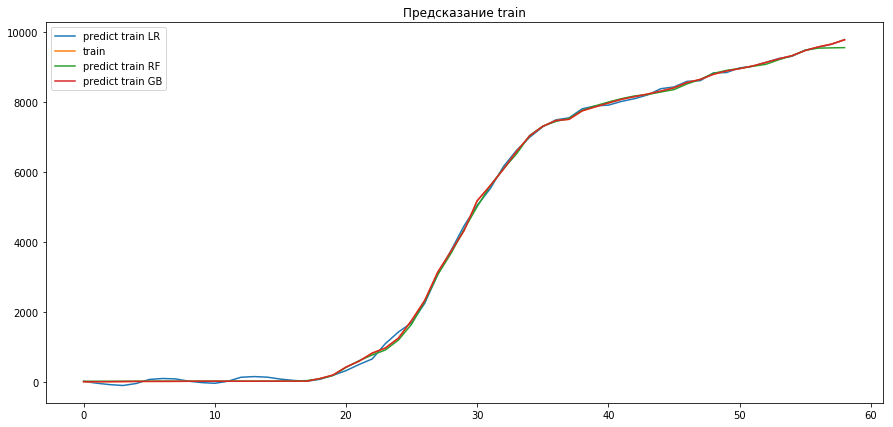

In [154]:
plt.figure(figsize=(15, 7))

plt.plot(y_pred_t, label='predict train LR')
plt.plot(y_train, label='train')

plt.plot(y_pred_t_f, label='predict train RF')

plt.plot(y_pred_t_g, label='predict train GB')

plt.legend()
plt.title('Предсказание train')
plt.show()

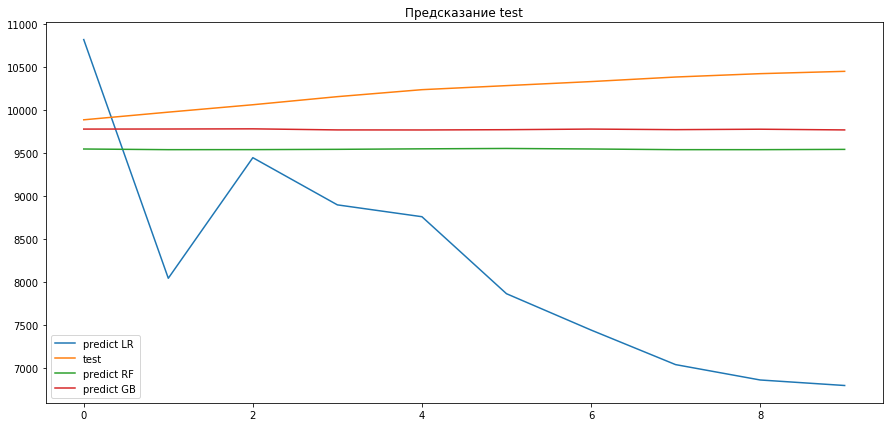

In [155]:
plt.figure(figsize=(15, 7))

plt.plot(y_pred, label='predict LR')
plt.plot(y_test, label='test')

plt.plot(y_pred_f, label='predict RF')

plt.plot(y_pred_g, label='predict GB')

plt.legend()
plt.title('Предсказание test')
plt.show()

Лучше всего предсказывает GB модель, на 10 дней предсказывает довольно точно

In [156]:
error_p =np.mean(np.abs(y_pred-y_test)/y_test)*100
error_p_f =np.mean(np.abs(y_pred_f-y_test)/y_test)*100
error_p_g =np.mean(np.abs(y_pred_g-y_test)/y_test)*100

print('error in MAPE LR:', error_p, '%')
print('error in MAPE RF:', error_p_f, '%')
print('error in MAPE GB:', error_p_g, '%')

error in MAPE LR: 20.918019713863057 %
error in MAPE RF: 6.566509574134789 %
error in MAPE GB: 4.312197679133271 %



3. вариант 1) Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам . Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent. (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )
3. вариант 2) Сделайте ресемплинг COVID19 на интервалы 3 дня, неделя, 2 недели.Постройте график изменения среднего по выборке и среднего отклонения по выборке на группах для интервалах 3 дня, неделя, 2 недели (одна группа на интервале - одно значение std или mean, т.е. если было 28 деней, то 9 значений для ресемплинга на 3 дня, 4 значения при ресемплинге неделя и 2 значения при ресемплинге 2 недели )

4. Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [187]:
brent_data = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение
Дата,
2019-09-01,58.84
2019-08-30,59.19
2019-08-29,60.37
2019-08-28,59.84
2019-08-27,59.59


In [188]:
brent_data  = brent_data.sort_index()

In [192]:
brent_data.head(10)

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63
2010-09-06,76.87
2010-09-07,77.26
2010-09-08,77.93
2010-09-09,77.21


In [189]:
brent_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2010-09-01 to 2019-09-01
Data columns (total 1 columns):
Значение    2667 non-null float64
dtypes: float64(1)
memory usage: 41.7 KB


In [190]:
brent_data.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


In [191]:
brent_data[brent_data['Значение'].isnull()].count()

Значение    0
dtype: int64

In [180]:
brent_data_M = brent_data.resample("M").mean()
brent_data_M.head(10)

,Значение
Дата,
2010-09-30,78.228148
2010-10-31,83.473462
2010-11-30,86.178077
2010-12-31,92.232308
2011-01-31,97.033200
2011-02-28,104.451250
2011-03-31,114.811538
2011-04-30,123.197826
2011-05-31,114.345385


In [181]:
brent_data_M.describe()

,Значение
count,109.000000
mean,80.571077
std,26.667645
min,31.984737
25%,57.264074
50%,75.704800
75%,108.559167
max,124.502308


In [182]:
brent_data_W = brent_data.resample("W").mean()
brent_data_W.head()

,Значение
Дата,
2010-09-05,76.616000
2010-09-12,77.673333
2010-09-19,78.693333
2010-09-26,78.518333
2010-10-03,81.211667


In [183]:
brent_data_W.describe()

,Значение
count,469.000000
mean,80.712938
std,26.661299
min,28.690000
25%,56.206000
50%,76.601667
75%,108.114000
max,125.006667


In [185]:
brent_data_Y = brent_data.resample("Y").mean()
brent_data_Y.head()

,Значение
Дата,
2010-12-31,84.963238
2011-12-31,110.758746
2012-12-31,111.377484
2013-12-31,108.137114
2014-12-31,99.435493


In [186]:
brent_data_Y.describe()

,Значение
count,10.000000
mean,80.528219
std,25.682467
min,45.350502
25%,57.270019
50%,78.307329
75%,105.961709
max,111.377484


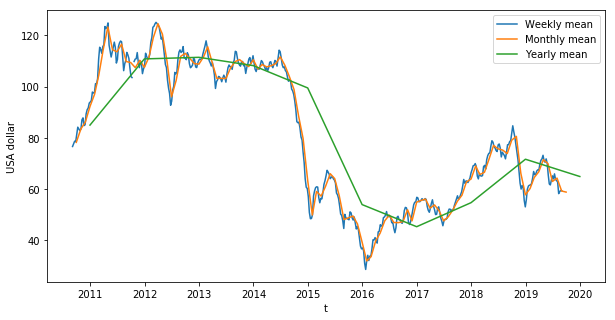

In [200]:
# _ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.figure(figsize=(10, 5))
plt.plot(brent_data_W, label='Weekly mean')
plt.plot(brent_data_M, label='Monthly mean')
plt.plot(brent_data_Y, label='Yearly mean')

plt.ylabel('USA dollar')
plt.xlabel('t')
plt.legend()
plt.show()

In [202]:
brent_data_W_std = brent_data.resample("W").std()
brent_data_W_std.head()

,Значение
Дата,
2010-09-05,0.185688
2010-09-12,0.649759
2010-09-19,0.539728
2010-09-26,0.596068
2010-10-03,2.408588


In [205]:
brent_data_W_std_M = brent_data_W_std.resample("M").mean()
brent_data_W_std_M.head()

,Значение
Дата,
2010-09-30,0.492811
2010-10-31,1.089151
2010-11-30,1.325877
2010-12-31,0.903806
2011-01-31,0.954304


In [206]:
brent_data_W_std_Y = brent_data_W_std.resample("Y").mean()
brent_data_W_std_Y.head()

,Значение
Дата,
2010-12-31,0.960925
2011-12-31,1.692663
2012-12-31,1.316001
2013-12-31,1.030242
2014-12-31,0.947655


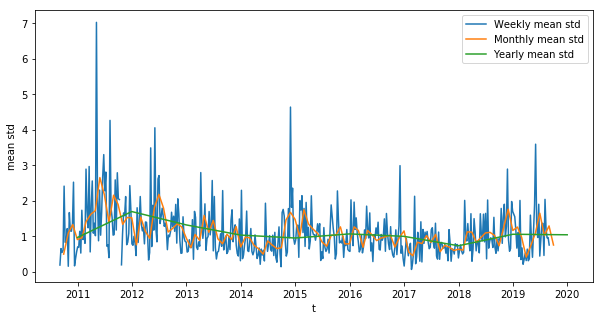

In [207]:
plt.figure(figsize=(10, 5))
plt.plot(brent_data_W_std, label='Weekly mean std')
plt.plot(brent_data_W_std_M, label='Monthly mean std')
plt.plot(brent_data_W_std_Y, label='Yearly mean std')

plt.ylabel('mean std')
plt.xlabel('t')
plt.legend()
plt.show()

5. Графики становятся более "плавные" со временем, т.е. чем больше период, за который снимаются данные, тем лучше видно "развитие" данных во времени, снижается влияние краткосрочных "скачков"